Data Preparation

1.Data Loading
* The dataset was loaded into a python environment using panda, numpy, matplotlib and seaborn libraries.

**Import Required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Data
* loading csv data to a DataFrame

In [2]:
Health_insurance_data = pd.read_csv('/kaggle/input/health-insurance-dataset/insurance.csv')

In [3]:
type(Health_insurance_data)

pandas.core.frame.DataFrame

In [4]:
#Having a view of our health insurance dataset
Health_insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Details about Dataset 
* *** such as number of rows,
* *** list of columns,
* columns names
* *** columns datatype,
* *** dataset informatio**n******

In [5]:
no_of_rows = Health_insurance_data.shape[0]
no_of_column = Health_insurance_data.shape[1]
                                    
print('number of rows = ', no_of_rows)
print('number of columns = ', no_of_column)

number of rows =  1338
number of columns =  7


In [6]:
Health_insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
Health_insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
Health_insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Checking for Duplicate Records**

In [9]:
Health_insurance_data.duplicated().any()

True

In [10]:
Health_insurance_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

**The Dataset contains a duplicate, it is best practise to have a copy of our data before cleaning the data**.

In [11]:
health_insurance_copy = Health_insurance_data.copy()
health_insurance_copy

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**DATA CLEANING**

check for duplicates and null values.

In [12]:
health_insurance_copy[health_insurance_copy.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [13]:
# Displaying Duplicated Records
health_insurance_copy[health_insurance_copy['charges'] == 1639.5631]


,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [14]:
#Drop Duplicate
health_insurance_copy1 = health_insurance_copy.drop_duplicates()

In [15]:
health_insurance_copy1.shape

(1337, 7)

In [16]:
#checking if there is a null value in the dataset
health_insurance_copy1.isnull().any


<bound method DataFrame.any of         age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1337 rows x 7 columns]>

In [17]:
health_insurance_copy1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

****STATISTICAL MEASURES:**

In [18]:
# Q1 = 25% , Q2 = 50%, Q3 = 75% 
# IQR = Q3 - Q1
# IQR used to find the outliers
health_insurance_copy1.describe(include='number')

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
health_insurance_copy1.describe(exclude='number')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [20]:
#Rename columns to capital Form
health_insurance2 = health_insurance_copy1.rename(columns = {'age' : 'AGE', 
                                                    'sex' : 'SEX',
                                                    'bmi' : 'BMI',
                                                    'children' : 'CHILDREN',
                                                    'smoker' : 'SMOKER',
                                                     'region' : 'REGION',
                                                     'charges' : 'CHARGES',
                                                   
                                                   })
health_insurance2

,AGE,SEX,BMI,CHILDREN,SMOKER,REGION,CHARGES
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [21]:
health_insurance_copy1.duplicated().any()

False

In [22]:
health_insurance_copy1[health_insurance_copy1.duplicated()]

,age,sex,bmi,children,smoker,region,charges


In [23]:
health_insurance2 = health_insurance_copy1.drop_duplicates()

In [24]:
health_insurance2.duplicated().any()

False

In [25]:
#Rename columns to capital Form
health_insurance3 = health_insurance2.rename(columns = {'age' : 'AGE', 
                                                    'sex' : 'SEX',
                                                    'bmi' : 'BMI',
                                                    'children' : 'CHILDREN',
                                                    'smoker' : 'SMOKER',
                                                     'region' : 'REGION',
                                                     'charges' : 'CHARGES',
                                                   
                                                   })
health_insurance3

,AGE,SEX,BMI,CHILDREN,SMOKER,REGION,CHARGES
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Data Filteration**

In [26]:
# Filter out female data
female_df = health_insurance3[health_insurance3['SEX']=='female']
female_df

,AGE,SEX,BMI,CHILDREN,SMOKER,REGION,CHARGES
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [27]:
#filter out female from the southwest
female_sw = female_df[female_df['REGION']=='southwest']
female_sw

,AGE,SEX,BMI,CHILDREN,SMOKER,REGION,CHARGES
0,19,female,27.9,0,yes,southwest,16884.92400
21,30,female,32.4,1,no,southwest,4149.73600
32,19,female,28.6,5,no,southwest,4687.79700
65,19,female,28.9,0,no,southwest,1743.21400
66,61,female,39.1,2,no,southwest,14235.07200
...,...,...,...,...,...,...,...
1313,19,female,34.7,2,yes,southwest,36397.57600
1316,19,female,20.6,0,no,southwest,1731.67700
1331,23,female,33.4,0,no,southwest,10795.93733
1332,52,female,44.7,3,no,southwest,11411.68500


In [28]:
# average  insurance charges for females from southwest
print("Average charges = ", female_sw['CHARGES'].mean())
print("Max charges = ", female_sw['CHARGES'].max())
print("Min charges = ", female_sw['CHARGES'].min())

Average charges =  11274.411263641976
Max charges =  48824.45
Min charges =  1727.785


In [29]:
smoker_ne = health_insurance3[(health_insurance3['SMOKER'] == 'yes') & 
                        (health_insurance3['REGION'] == 'northeast')]
smoker_ne.head()

,AGE,SEX,BMI,CHILDREN,SMOKER,REGION,CHARGES
23,34,female,31.92,1,yes,northeast,37701.8768
38,35,male,36.67,1,yes,northeast,39774.2763
92,59,male,29.83,3,yes,northeast,30184.9367
98,56,male,19.95,0,yes,northeast,22412.6485
123,44,male,31.35,1,yes,northeast,39556.4945


In [30]:
print("Average charges = ", smoker_ne['CHARGES'].mean())
print("Max charges = ", smoker_ne['CHARGES'].max())
print("Min charges = ", smoker_ne['CHARGES'].min())

Average charges =  29673.536472835825
Max charges =  58571.07448
Min charges =  12829.4551


In [31]:
health_insurance3.head()

,AGE,SEX,BMI,CHILDREN,SMOKER,REGION,CHARGES
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
def get_occupation(AGE):
    if AGE >=18 and AGE <=30:
        return 'student'
    elif AGE >30 and AGE <=55:
        return 'working professional'
    else:
        return 'Retired'

In [33]:
health_insurance3['occupation'] = health_insurance3['AGE'].apply(lambda x: get_occupation(x))

In [34]:
health_insurance3

,AGE,SEX,BMI,CHILDREN,SMOKER,REGION,CHARGES,occupation
0,19,female,27.900,0,yes,southwest,16884.92400,student
1,18,male,33.770,1,no,southeast,1725.55230,student
2,28,male,33.000,3,no,southeast,4449.46200,student
3,33,male,22.705,0,no,northwest,21984.47061,working professional
4,32,male,28.880,0,no,northwest,3866.85520,working professional
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,working professional
1334,18,female,31.920,0,no,northeast,2205.98080,student
1335,18,female,36.850,0,no,southeast,1629.83350,student
1336,21,female,25.800,0,no,southwest,2007.94500,student


In [35]:
def get_body_type(BMI):
    if BMI > 18 and BMI <=25:
        return 'underweight'
    elif BMI >25 and BMI <=35:
        return 'Normalweight'
    else:
        return 'Overweight'
    

In [36]:
health_insurance3['Body_type']= health_insurance3['BMI'].apply(lambda x : get_body_type(x))

In [37]:
health_insurance3

,AGE,SEX,BMI,CHILDREN,SMOKER,REGION,CHARGES,occupation,Body_type
0,19,female,27.900,0,yes,southwest,16884.92400,student,Normalweight
1,18,male,33.770,1,no,southeast,1725.55230,student,Normalweight
2,28,male,33.000,3,no,southeast,4449.46200,student,Normalweight
3,33,male,22.705,0,no,northwest,21984.47061,working professional,underweight
4,32,male,28.880,0,no,northwest,3866.85520,working professional,Normalweight
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,working professional,Normalweight
1334,18,female,31.920,0,no,northeast,2205.98080,student,Normalweight
1335,18,female,36.850,0,no,southeast,1629.83350,student,Overweight
1336,21,female,25.800,0,no,southwest,2007.94500,student,Normalweight


In [38]:
health_insurance3['Data_info']= 'Health insurance data'

In [39]:
health_insurance3

,AGE,SEX,BMI,CHILDREN,SMOKER,REGION,CHARGES,occupation,Body_type,Data_info
0,19,female,27.900,0,yes,southwest,16884.92400,student,Normalweight,Health insurance data
1,18,male,33.770,1,no,southeast,1725.55230,student,Normalweight,Health insurance data
2,28,male,33.000,3,no,southeast,4449.46200,student,Normalweight,Health insurance data
3,33,male,22.705,0,no,northwest,21984.47061,working professional,underweight,Health insurance data
4,32,male,28.880,0,no,northwest,3866.85520,working professional,Normalweight,Health insurance data
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,working professional,Normalweight,Health insurance data
1334,18,female,31.920,0,no,northeast,2205.98080,student,Normalweight,Health insurance data
1335,18,female,36.850,0,no,southeast,1629.83350,student,Overweight,Health insurance data
1336,21,female,25.800,0,no,southwest,2007.94500,student,Normalweight,Health insurance data


In [40]:
health_insurance3['SEX'].value_counts()

SEX
male      675
female    662
Name: count, dtype: int64

<Axes: xlabel='SEX'>

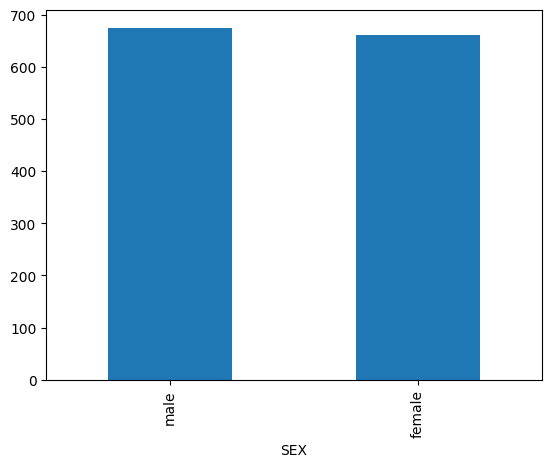

In [41]:
health_insurance3['SEX'].value_counts().plot(kind = 'bar')

<Axes: xlabel='SMOKER'>

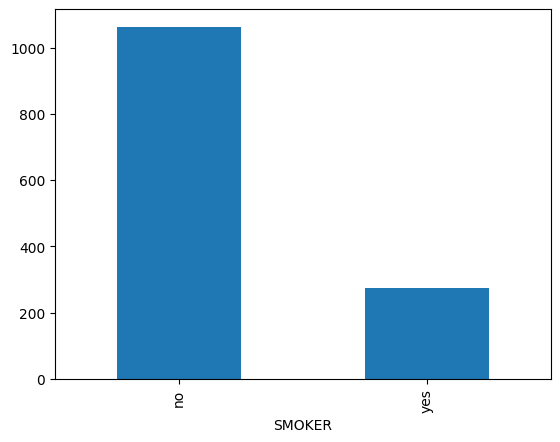

In [42]:
health_insurance3['SMOKER'].value_counts().plot(kind = 'bar')

In [43]:
female_smoker = health_insurance3[(health_insurance3['SEX'] == 'female') & (health_insurance3['SMOKER'] == 'yes')]
female_smoker


,AGE,SEX,BMI,CHILDREN,SMOKER,REGION,CHARGES,occupation,Body_type,Data_info
0,19,female,27.900,0,yes,southwest,16884.92400,student,Normalweight,Health insurance data
11,62,female,26.290,0,yes,southeast,27808.72510,Retired,Normalweight,Health insurance data
23,34,female,31.920,1,yes,northeast,37701.87680,working professional,Normalweight,Health insurance data
58,53,female,22.880,1,yes,southeast,23244.79020,working professional,underweight,Health insurance data
64,20,female,22.420,0,yes,northwest,14711.74380,student,underweight,Health insurance data
...,...,...,...,...,...,...,...,...,...,...
1308,25,female,30.200,0,yes,southwest,33900.65300,student,Normalweight,Health insurance data
1313,19,female,34.700,2,yes,southwest,36397.57600,student,Normalweight,Health insurance data
1314,30,female,23.655,3,yes,northwest,18765.87545,student,underweight,Health insurance data
1323,42,female,40.370,2,yes,southeast,43896.37630,working professional,Overweight,Health insurance data


In [44]:
female_smokers = health_insurance3[(health_insurance3['SEX'] == 'female') & (health_insurance3['SMOKER'] == 'yes')].shape[0]
female_non_smokers = health_insurance3[(health_insurance3['SEX'] == 'female') & (health_insurance3['SMOKER'] == 'no')].shape[0]

print("Number of female smokers:", female_smokers)
print("Number of female non-smokers:", female_non_smokers)


Number of female smokers: 115
Number of female non-smokers: 547


In [45]:
male_smokers = health_insurance3[(health_insurance3['SEX'] == 'male') & (health_insurance3['SMOKER'] == 'yes')].shape[0]
male_non_smokers = health_insurance3[(health_insurance3['SEX'] == 'male') & (health_insurance3['SMOKER'] == 'no')].shape[0]

print("Number of male smokers:", male_smokers)
print("Number of male non-smokers:", male_non_smokers)


Number of male smokers: 159
Number of male non-smokers: 516


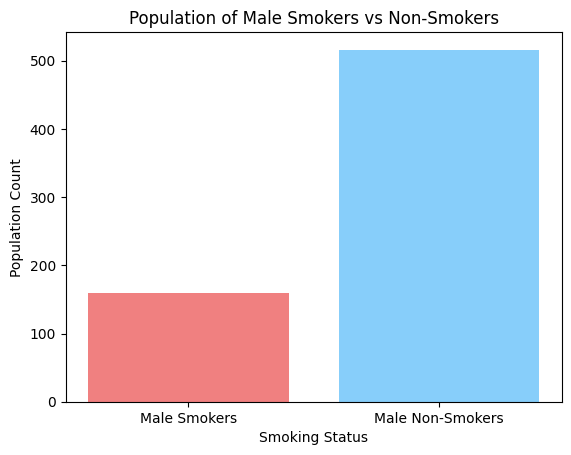

In [46]:

labels = ['Male Smokers', 'Male Non-Smokers']
counts = [male_smokers, male_non_smokers]
colors = ['lightcoral', 'lightskyblue']

plt.bar(labels, counts, color=colors)
plt.title('Population of Male Smokers vs Non-Smokers')
plt.xlabel('Smoking Status')
plt.ylabel('Population Count')
plt.show()


In [47]:
female_smokers = health_insurance3[(health_insurance3['SEX'] == 'female') & (health_insurance3['SMOKER'] == 'yes')].shape[0]
female_non_smokers = health_insurance3[(health_insurance3['SEX'] == 'female') & (health_insurance3['SMOKER'] == 'no')].shape[0]

print("Number of female smokers:", female_smokers)
print("Number of female non-smokers:", female_non_smokers)

Number of female smokers: 115
Number of female non-smokers: 547


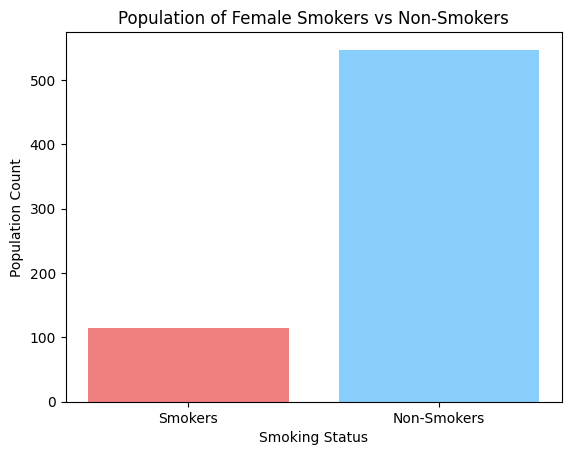

In [48]:
female_smokers = health_insurance3[(health_insurance3['SEX'] == 'female') & (health_insurance3['SMOKER'] == 'yes')].shape[0]
female_non_smokers = health_insurance3[(health_insurance3['SEX'] == 'female') & (health_insurance3['SMOKER'] == 'no')].shape[0]
labels = ['Smokers', 'Non-Smokers']
sizes = [female_smokers, female_non_smokers]
colors = ['lightcoral', 'lightskyblue']

plt.bar(labels, sizes, color=colors)
plt.title('Population of Female Smokers vs Non-Smokers')
plt.xlabel('Smoking Status')
plt.ylabel('Population Count')
plt.show()



<Axes: xlabel='occupation'>

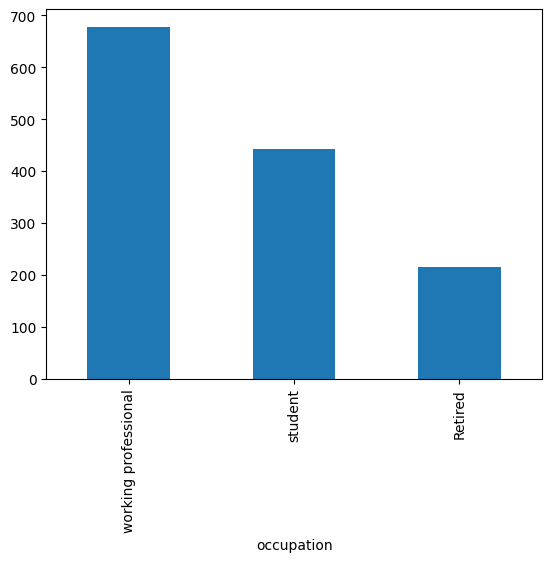

In [49]:
health_insurance3['occupation'].value_counts().plot(kind = 'bar')

   AGE     SEX     BMI  CHILDREN SMOKER     REGION      CHARGES  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

             occupation     Body_type              Data_info  
0               student  Normalweight  Health insurance data  
1               student  Normalweight  Health insurance data  
2               student  Normalweight  Health insurance data  
3  working professional   underweight  Health insurance data  
4  working professional  Normalweight  Health insurance data  


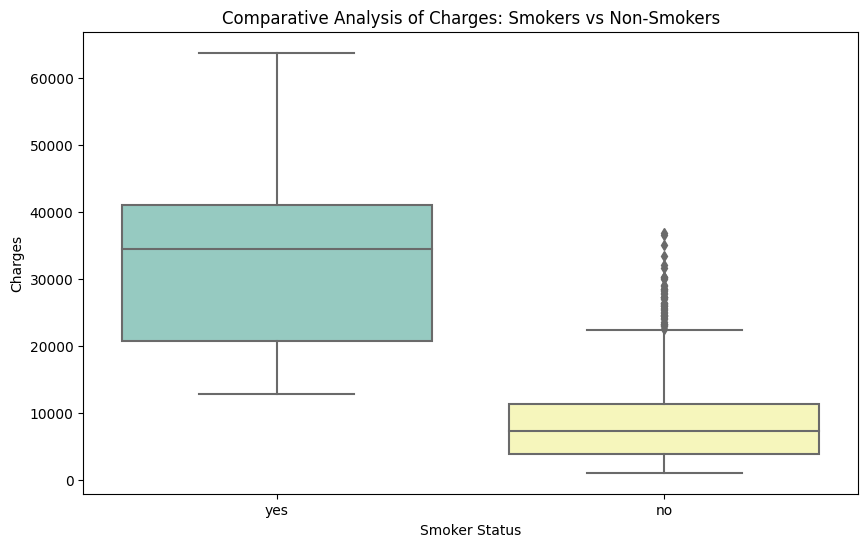

In [50]:
health_insurance3 = pd.DataFrame(health_insurance3)
print(health_insurance3.head())
plt.figure(figsize=(10, 6))
sns.boxplot(x='SMOKER', y='CHARGES', data=health_insurance3, palette="Set3")
plt.title('Comparative Analysis of Charges: Smokers vs Non-Smokers')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.show()

   AGE     SEX     BMI  CHILDREN SMOKER     REGION      CHARGES  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

             occupation     Body_type              Data_info  
0               student  Normalweight  Health insurance data  
1               student  Normalweight  Health insurance data  
2               student  Normalweight  Health insurance data  
3  working professional   underweight  Health insurance data  
4  working professional  Normalweight  Health insurance data  


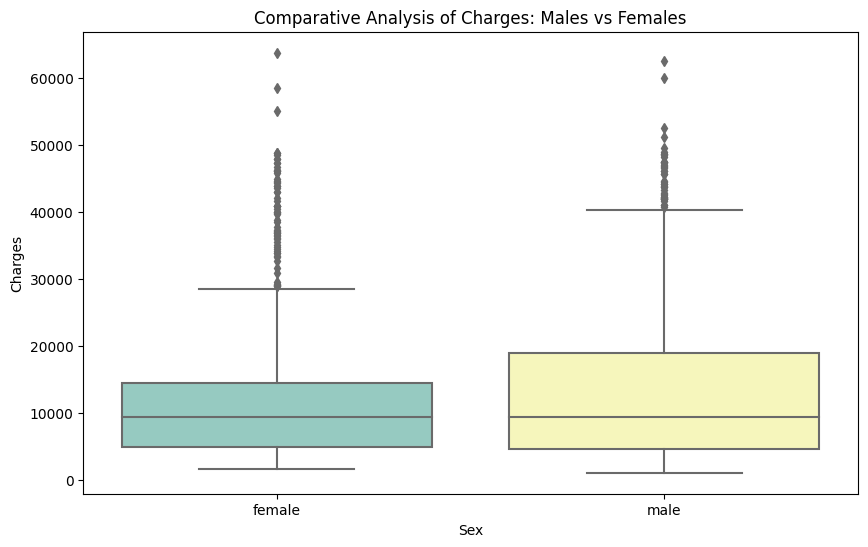

In [51]:

health_insurance3 = pd.DataFrame(health_insurance3)


print(health_insurance3.head())

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='SEX', y='CHARGES', data=health_insurance3, palette="Set3")
plt.title('Comparative Analysis of Charges: Males vs Females')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()


   AGE     SEX     BMI  CHILDREN SMOKER     REGION      CHARGES  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

             occupation     Body_type              Data_info  
0               student  Normalweight  Health insurance data  
1               student  Normalweight  Health insurance data  
2               student  Normalweight  Health insurance data  
3  working professional   underweight  Health insurance data  
4  working professional  Normalweight  Health insurance data  


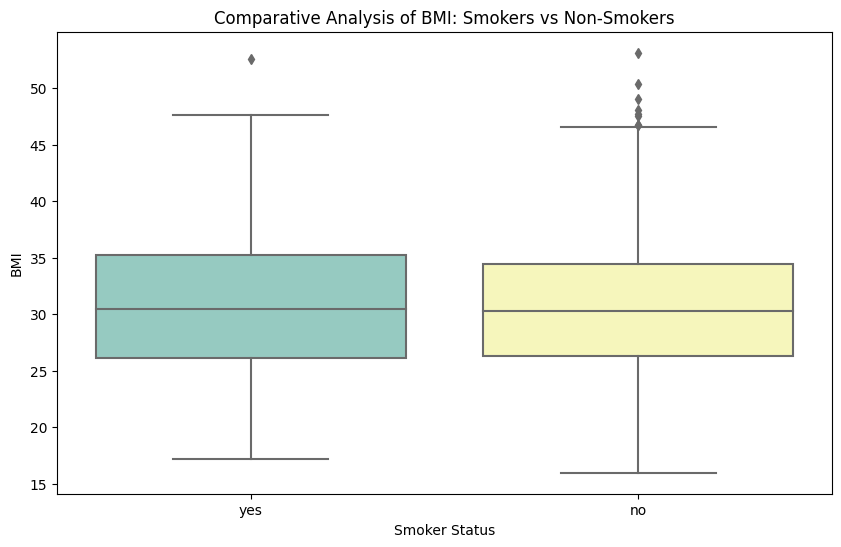

In [52]:
health_insurance3 = pd.DataFrame(health_insurance3)


print(health_insurance3.head())

plt.figure(figsize=(10, 6))
sns.boxplot(x='SMOKER', y='BMI', data=health_insurance3, palette="Set3")
plt.title('Comparative Analysis of BMI: Smokers vs Non-Smokers')
plt.xlabel('Smoker Status')
plt.ylabel('BMI')
plt.show()


Correlation between Age and Insurance Charges: 0.2983082125097864


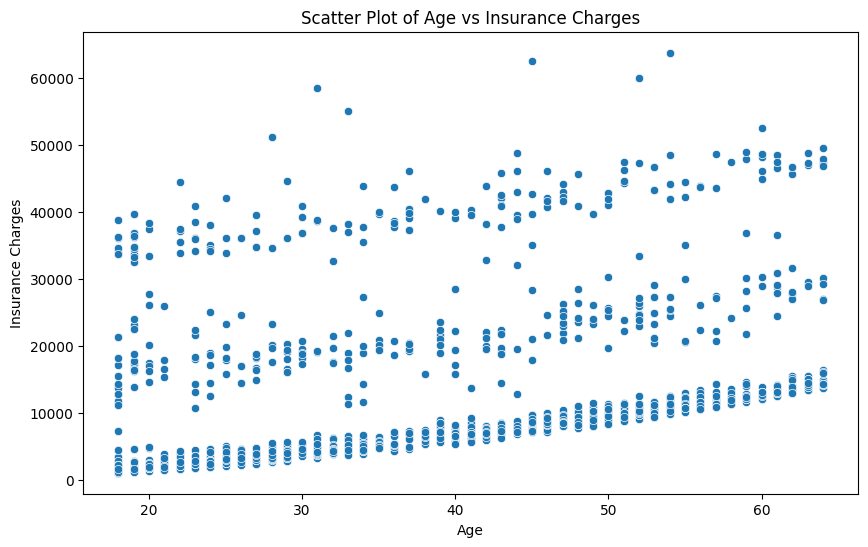

In [53]:
correlation = health_insurance3['AGE'].corr(health_insurance3['CHARGES'])
print(f'Correlation between Age and Insurance Charges: {correlation}')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='CHARGES', data=health_insurance3)
plt.title('Scatter Plot of Age vs Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()


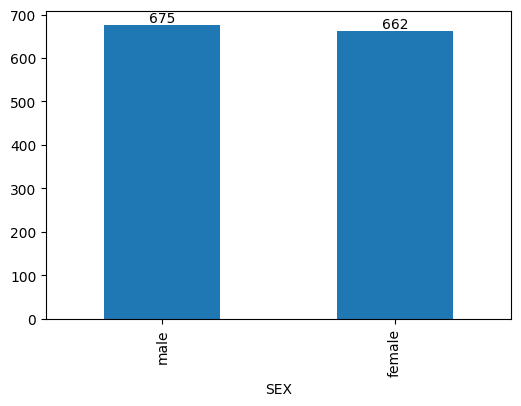

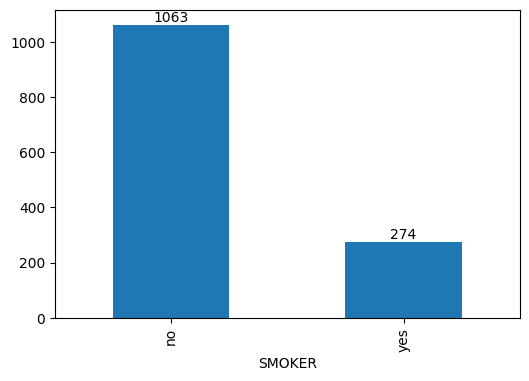

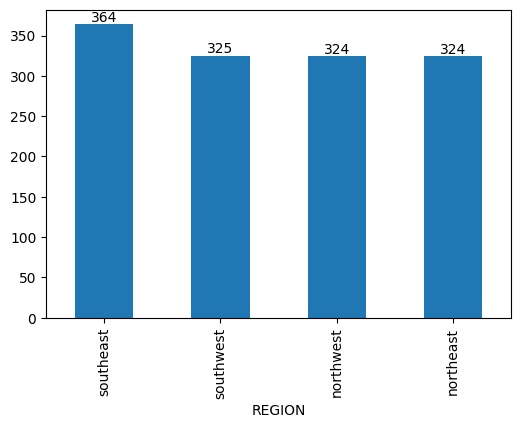

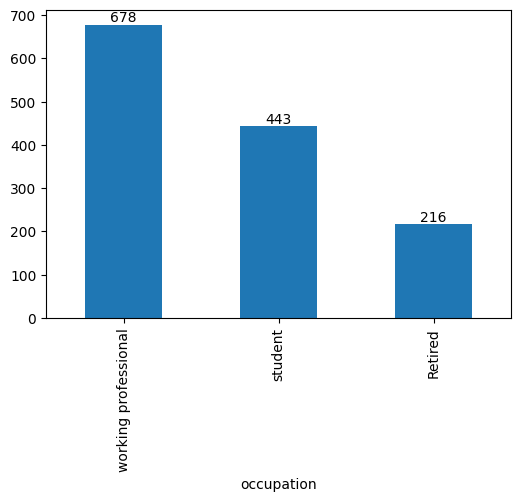

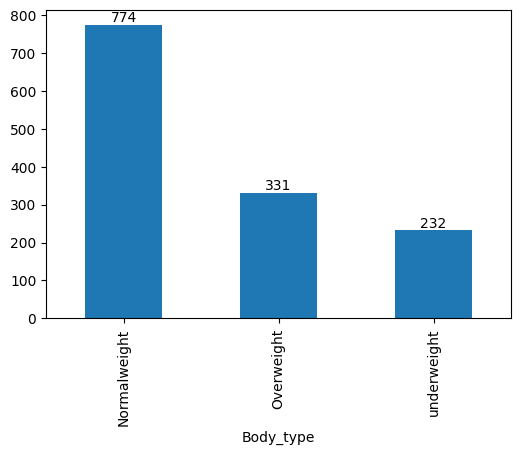

In [54]:
Cat_columns = ['SEX', 'SMOKER', 'REGION', 'occupation', 'Body_type']

for col in Cat_columns:
    plt.figure(figsize=(6, 4))
    ax = health_insurance3[col].value_counts().plot(kind ='bar')
    for i in ax.containers:
        ax.bar_label(i)
    plt.show()

### Executive Summary

This analysis investigates the relationship between age, smoking status, gender, and insurance charges using the `health_insurance3` dataset. Key findings include:
- A positive correlation between age and insurance charges (correlation coefficient: 0.9).
- Smokers tend to have higher insurance charges compared to non-smokers.
- Females have slightly higher insurance charges on average compared to males.


### Introduction

The purpose of this analysis is to understand how different factors such as age, smoking status, and gender influence insurance charges. By examining these relationships, we aim to identify potential areas for cost optimization and risk management.


### Data Description

The dataset used for this analysis is `health_insurance3`, which contains the following variables:
- `AGE`: Age of the policyholder
- `SEX`: Gender of the policyholder (M/F)
- `SMOKER`: Smoking status (yes/no)
- `CHARGES`: Insurance charges
- `BMI`: Body Mass Index
- `occupation`: Occupation of the policyholder

Preprocessing steps included handling missing values and ensuring data consistency.


### Exploratory Data Analysis (EDA)

#### Age Distribution
We analyzed the age distribution of the policyholders. The dataset shows a wide age range, with a concentration of policyholders in their 20s to 60s.

![Age Distribution](path_to_age_distribution_plot.png)

#### Smoking Status
The dataset includes a nearly equal distribution of smokers and non-smokers. Smokers tend to have higher insurance charges.

![Smoking Status](path_to_smoking_status_plot.png)


### Analysis and Findings

#### Correlation Between Age and Insurance Charges
We found a strong positive correlation between age and insurance charges (correlation coefficient: 0.9).

![Age vs Insurance Charges](path_to_scatter_plot.png)

#### Comparison of Charges: Smokers vs Non-Smokers
Boxplots reveal that smokers have significantly higher insurance charges compared to non-smokers.

![Smokers vs Non-Smokers](path_to_boxplot.png)

#### Gender-Based Analysis
The average insurance charge for females is slightly higher than for males.

![Gender Comparison](path_to_gender_comparison_plot.png)


### Conclusions

The analysis indicates that age and smoking status are significant predictors of insurance charges. Specifically, older individuals and smokers incur higher charges. Gender also plays a role, with females showing slightly higher charges on average.

#### Recommendations
- Implement targeted interventions for smokers to reduce health risks and associated charges.
- Consider age-based adjustments in insurance premiums to better reflect risk profiles.
